## Analysis of Alzheimer's MRI Dataset

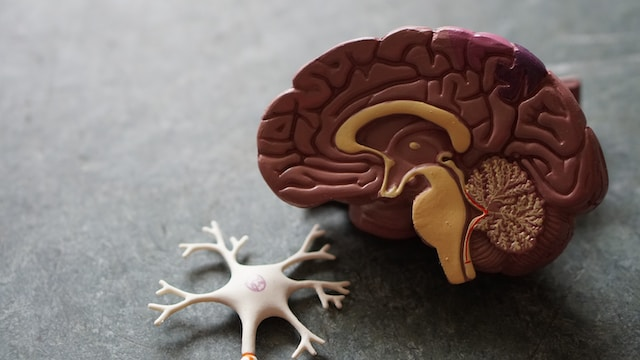

*Alzheimer’s creates visible damage to the brain that can be detected by radiologists via MRI scans.*

Neural Networks

The objective of this assignment is to develop and compare multiple machine learning models, including a transfer learning model, a custom-built deep neural network (DNN), and a bespoke model, to accurately classify the stage of Alzheimer's disease from MRI images.

---

*Matthew Acs*

Alzheimer’s is the leading cause of dementia. It is a progressive disease that affects the region of the brain that controls thoughts, memory, and language. Initially, an affected patient may have mild memory loss, but overtime, the degree of impairment may progress significantly to the point that conversation ability may be entirely inhibited. Alzheimer’s disease is also common in Adults over 65; more than 10% of Americans over 65 have Alzheimer’s disease. The  causes, effects, and treatments for Alzheimer’s disease are not yet fully understood, but there is no known cure. The financial and emotion burden on the families of those with the disease is immense. For these reasons, advancing diagnostic technology is imperative to the medical community. This notebook explores the use of neural networks to classify brain MRIs into four categories of increasing severity of dementia (non, very mild, mild, and moderate). MRIs can help with the diagnosis and monitoring of Alzheimer’s because patients will show brain atrophy in affected areas. This effect is visible in CT scans and MRIs.

**Note: Due to the stochastic nature of the models in this notebook, the results are based on an average instance, but if the notebook is executed again the results may differ slightly.**

# Loading the Dataset and Data Preprocessing
---

The first step is to load, prepare, and preprocess the dataset. In order to do this, the dataset must first be uploaded to this notebook. Then the following code extracts the data from the train and test directories and creates tensors for training data/labels and tensors for test data/labels. To preprocess the data, the tensors are shuffled, the labels are one-hot encoded, and the image data is normalized and reshaped. The data is also created into a pseudo-3 channel RBG image for transfer learning using the VGG16 model.

---

Installs the patool python library so that the .rar file can be extracted.

---

In [ ]:
pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 2.8 MB/s eta 0:00:00


---

Installs the visualkeras python library so that the neural networks can be visualized.

---

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 11.6 MB/s eta 0:00:00


---

Imports all necessary python packages.

---

In [ ]:
# import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from os import listdir
from matplotlib import image
import patoolib

import visualkeras
import plotly.express as px
from sklearn.utils import shuffle
from sklearn.decomposition import KernelPCA, PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
import tensorflow as tf
from keras import models, layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import load_model
from yellowbrick.classifier import ConfusionMatrix

---

Extracts the data from the archive file using patool.

---

In [ ]:
patoolib.extract_archive("Alzheimer_s Dataset.rar")

INFO patool: Extracting Alzheimer_s Dataset.rar ...
INFO:patool:Extracting Alzheimer_s Dataset.rar ...
INFO patool: running /usr/bin/unrar x -- "/content/Alzheimer_s Dataset.rar"
INFO:patool:running /usr/bin/unrar x -- "/content/Alzheimer_s Dataset.rar"
INFO patool:     with cwd='./Unpack_h83932h7', input=''
INFO:patool:    with cwd='./Unpack_h83932h7', input=''
INFO patool: ... Alzheimer_s Dataset.rar extracted to `Alzheimer_s Dataset'.
INFO:patool:... Alzheimer_s Dataset.rar extracted to `Alzheimer_s Dataset'.


'Alzheimer_s Dataset'

---

Loads the training images from the train directory and stores them into lists corresponding to mild, moderate, non, and very mild dementia.

---

In [ ]:
loaded_images_train_mild = list()
for filename in listdir('/content/Alzheimer_s Dataset/train/MildDemented'):
	# load image
	img_data = image.imread('/content/Alzheimer_s Dataset/train/MildDemented/' + filename)
	# store loaded image
	loaded_images_train_mild.append(img_data)

loaded_images_train_moderate = list()
for filename in listdir('/content/Alzheimer_s Dataset/train/ModerateDemented'):
	# load image
	img_data = image.imread('/content/Alzheimer_s Dataset/train/ModerateDemented/' + filename)
	# store loaded image
	loaded_images_train_moderate.append(img_data)

loaded_images_train_non = list()
for filename in listdir('/content/Alzheimer_s Dataset/train/NonDemented'):
	# load image
	img_data = image.imread('/content/Alzheimer_s Dataset/train/NonDemented/' + filename)
	# store loaded image
	loaded_images_train_non.append(img_data)

loaded_images_train_very = list()
for filename in listdir('/content/Alzheimer_s Dataset/train/VeryMildDemented'):
	# load image
	img_data = image.imread('/content/Alzheimer_s Dataset/train/VeryMildDemented/' + filename)
	# store loaded image
	loaded_images_train_very.append(img_data)

---

Loads the test images from the test directory and stores them into lists corresponding to mild, moderate, non, and very mild dementia.

---

In [ ]:
loaded_images_test_mild = list()
for filename in listdir('/content/Alzheimer_s Dataset/test/MildDemented'):
	# load image
	img_data = image.imread('/content/Alzheimer_s Dataset/test/MildDemented/' + filename)
	# store loaded image
	loaded_images_test_mild.append(img_data)

loaded_images_test_moderate = list()
for filename in listdir('/content/Alzheimer_s Dataset/test/ModerateDemented'):
	# load image
	img_data = image.imread('/content/Alzheimer_s Dataset/test/ModerateDemented/' + filename)
	# store loaded image
	loaded_images_test_moderate.append(img_data)

loaded_images_test_non = list()
for filename in listdir('/content/Alzheimer_s Dataset/test/NonDemented'):
	# load image
	img_data = image.imread('/content/Alzheimer_s Dataset/test/NonDemented/' + filename)
	# store loaded image
	loaded_images_test_non.append(img_data)

loaded_images_test_very = list()
for filename in listdir('/content/Alzheimer_s Dataset/test/VeryMildDemented'):
	# load image
	img_data = image.imread('/content/Alzheimer_s Dataset/test/VeryMildDemented/' + filename)
	# store loaded image
	loaded_images_test_very.append(img_data)

---

Concatenates all of the training data and labels into respective X and y arrays. The data is then shuffled to remove the ordering and the training labels are one-hot encoded.  

---

In [ ]:
## Create training dataset
X_train = np.concatenate([
    loaded_images_train_non,
    loaded_images_train_very,
    loaded_images_train_mild,
    loaded_images_train_moderate
])

## Create labels
y_train = np.concatenate([
    np.zeros(len(loaded_images_train_non)),
    np.ones(len(loaded_images_train_very)),
    np.ones(len(loaded_images_train_mild)) * 2,
    np.ones(len(loaded_images_train_moderate)) * 3
])

## Shuffle and one-hot encode
X_train, y_train = shuffle(X_train, y_train)
y_train_label = deepcopy(y_train)
y_train = to_categorical(y_train, num_classes = 4)

---

Concatenates all of the test data and labels into respective X and y arrays. The data is then shuffled to remove the ordering and the test labels are one-hot encoded.  

---

In [ ]:
## Create test dataset
X_test = np.concatenate([
    loaded_images_test_non,
    loaded_images_test_very,
    loaded_images_test_mild,
    loaded_images_test_moderate
])

## Create labels
y_test = np.concatenate([
    np.zeros(len(loaded_images_test_non)),
    np.ones(len(loaded_images_test_very)),
    np.ones(len(loaded_images_test_mild)) * 2,
    np.ones(len(loaded_images_test_moderate)) * 3
])

## Shuffle and one-hot encode
X_test, y_test = shuffle(X_test, y_test)
y_test_label = deepcopy(y_test)
y_test = to_categorical(y_test, num_classes = 4)

---

The training and test data images are reshaped and normalized.

---

In [ ]:
X_train = X_train.reshape(-1, 208, 176, 1) / 255.0
X_test = X_test.reshape(-1, 208, 176, 1) / 255.0

---

The training data is converted into a pseudo rgb image for use in transfer learning.

---

In [ ]:
X_train_transfer = np.repeat(X_train, 3, axis=3)

---

The test data is converted into a pseudo rgb image for use in transfer learning.

---

In [ ]:
X_test_transfer = np.repeat(X_test, 3, axis=3)

The dataset is now downloaded and prepared for training neural networks. I used the image preprocessing techniques of normalizing and resizing the images as well as one-hot encoding. I did not utilize image augmentation because the MRI images in this dataset are very regular. They all capture the brain in a specific scale, brightness, and orientation and thus data augmentation such as rotation may not accurately represent the type of MRI images that the model will see during application.  

# Exploratory Data Analysis
---

This section will explore the dataset to gather intuition about the general characteristics of the data. I first displayed an image from each class for both the training data and the test data. Then I created bar graphs to see how many images are in each class in both the training and test data. Finally, I created a PCA visualization with the training data alone and with the entire dataset to visualize the general distribution of the data after dimensionality reduction.

---

The code below displays an image from each class from the training data.

---

TRAINING DATA
----------



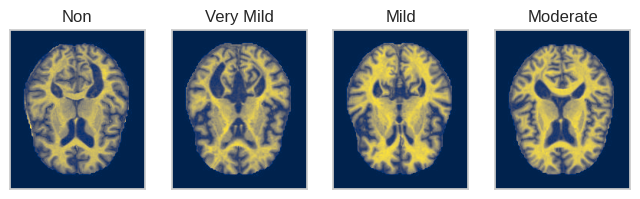

In [ ]:
flag_0 = 0
flag_1 = 0
flag_2 = 0
flag_3 = 0

for i in range(len(X_train)):

    ## Display a training data image from non class
    if (y_train_label[i] == 0) and flag_0 == 0:
        plt.subplot(1, 4, 1)
        plt.imshow(X_train[i], cmap='cividis')
        plt.title(f"Non")
        plt.xticks([])
        plt.yticks([])
        flag_0 = 1

    ## Display a training data image from very mild class
    if (y_train_label[i] == 1) and flag_1 == 0:
        plt.subplot(1, 4, 2)
        plt.imshow(X_train[i], cmap='cividis')
        plt.title(f"Very Mild")
        plt.xticks([])
        plt.yticks([])
        flag_1 = 1

    ## Display a training data image from mild class
    if (y_train_label[i] == 2) and flag_2 == 0:
        plt.subplot(1, 4, 3)
        plt.imshow(X_train[i], cmap='cividis')
        plt.title(f"Mild")
        plt.xticks([])
        plt.yticks([])
        flag_2 = 1

    ## Display a training data image from moderate class
    if (y_train_label[i] == 3) and flag_3 == 0:
        plt.subplot(1, 4, 4)
        plt.imshow(X_train[i], cmap='cividis')
        plt.title(f"Moderate")
        plt.xticks([])
        plt.yticks([])
        flag_3 = 1

    if flag_0 and flag_1 and flag_2 and flag_3:
        break

print("TRAINING DATA")
print("----------")
print()
plt.show()

More severe dementia is associated with a greater degree of brain atrophy in certain areas. This trend can generally be seen upon inspecting the images, however, to an untrained eye, the distinction is difficult to make.

---

The code below displays an image from each class from the test data.

---

TEST DATA
----------



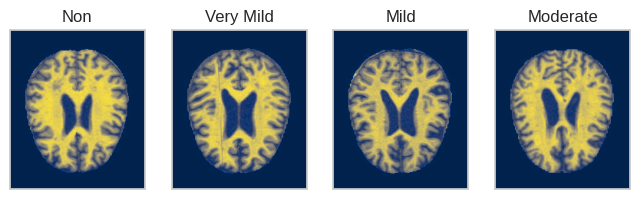

In [ ]:
flag_0 = 0
flag_1 = 0
flag_2 = 0
flag_3 = 0

for i in range(len(X_test)):

    ## Display a test data image from non class
    if (y_test_label[i] == 0) and flag_0 == 0:
        plt.subplot(1, 4, 1)
        plt.imshow(X_test[i], cmap='cividis')
        plt.title(f"Non")
        plt.xticks([])
        plt.yticks([])
        flag_0 = 1

    ## Display a test data image from very mild class
    if (y_test_label[i] == 1) and flag_1 == 0:
        plt.subplot(1, 4, 2)
        plt.imshow(X_test[i], cmap='cividis')
        plt.title(f"Very Mild")
        plt.xticks([])
        plt.yticks([])
        flag_1 = 1

    ## Display a test data image from mild class
    if (y_test_label[i] == 2) and flag_2 == 0:
        plt.subplot(1, 4, 3)
        plt.imshow(X_test[i], cmap='cividis')
        plt.title(f"Mild")
        plt.xticks([])
        plt.yticks([])
        flag_2 = 1

    ## Display a test data image from moderate class
    if (y_test_label[i] == 3) and flag_3 == 0:
        plt.subplot(1, 4, 4)
        plt.imshow(X_test[i], cmap='cividis')
        plt.title(f"Moderate")
        plt.xticks([])
        plt.yticks([])
        flag_3 = 1

    if flag_0 and flag_1 and flag_2 and flag_3:
        break

print("TEST DATA")
print("----------")
print()
plt.show()

A similar pattern can also be vaguely seen in the test data. One important observation is that the test data seems to have a large gap in the middle, which is not present on all training images. This may create a challenge for the models, as they may learn an assumption (no gap in the middle of the brain slice) which will be violated in the test dataset.

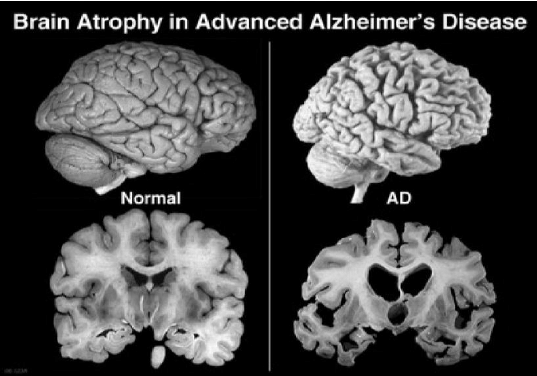

*The image above shows the expected effect of increasing dementia severity on the MRI scans. While this trend seems to be present, it is not as obvious as in the image.*

---

The code below displays a bar graph to visualize the distribution of images across classes in the training data.

---

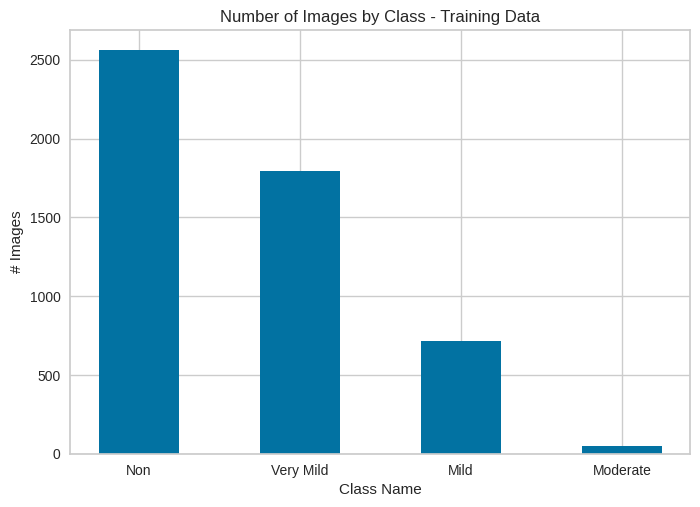

In [ ]:
number_classes = {'Non': len(loaded_images_train_non),
'Very Mild': len(loaded_images_train_very),
'Mild': len(loaded_images_train_mild),
'Moderate': len(loaded_images_train_moderate)}

## Plots the number of datapoints per class in the training data
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class - Training Data");
plt.xlabel('Class Name');
plt.ylabel('# Images');

---

The code below displays a bar graph to visualize the distribution of images across classes in the test data.

---

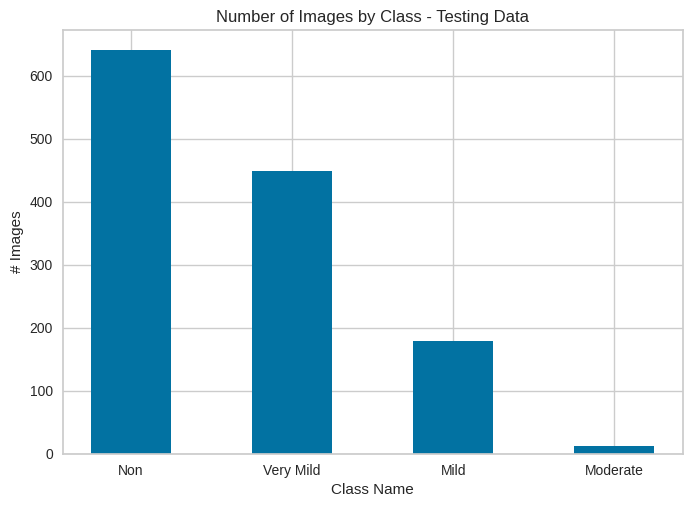

In [ ]:
number_classes = {'Non': len(loaded_images_test_non),
'Very Mild': len(loaded_images_test_very),
'Mild': len(loaded_images_test_mild),
'Moderate': len(loaded_images_test_moderate)}

## Plots the number of datapoints per class in the test data
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class - Testing Data");
plt.xlabel('Class Name');
plt.ylabel('# Images');

The bar graphs show that both the training and test data have a similar distribution across classes. Furthermore, there are less datapoints as the severity of the individual’s dementia increases. This effect is very pronounced, with moderate images comprising only a few percent of the entire dataset. This makes the classification problem at hand a highly imbalanced one, which should be considered during model evaluation. If the model predicts the non-demented class for every sample, it will achieve an accuracy of ~40%. Thus, any model that does not beat that baseline performs very poorly.  

---

The code below fits a 3D PCA to the training data and plots the projected data.

---

In [ ]:
## Flattens the training data
X_PCA = []
for X in X_train:
  X_PCA.append(X.flatten())

## Fits a 3D PCA to the training data
pca_3D = PCA(n_components=3)
X_pca_3D = pca_3D.fit_transform(X_PCA)

## Displays the data projected to the 3D PCA
fig = px.scatter_3d(
      X_pca_3D, x=0, y=1, z=2, color=y_train_label,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

The PCA shows that the classes are indeed separable in the PCA space. The four different classes occupy distinct regions, which indicate that a model could potentially fit a function to separate the classes with all dimensions (and information) present. The u-shape of the data that the classes are found along also indicates that a variety of brain splices are used in the training data.

---

The code below fits a 3D PCA to all the data and plots the projected data. The training data is purple-ish and the test-data is orange-ish with the different hues representing the different classes.

---

In [ ]:
## Flattens and combines the training and test data
X_PCA = []
for X in X_train:
  X_PCA.append(X.flatten())

for X in X_test:
  X_PCA.append(X.flatten())

## Fits a 3D PCA to all the data
pca_3D = PCA(n_components=3)
X_pca_3D = pca_3D.fit_transform(X_PCA)

## Combines the labels
labels = []
for y in y_train_label:
  labels.append(y)

for y in y_test_label:
  labels.append(y+4)

## Displays the data projected to the 3D PCA
fig = px.scatter_3d(
      X_pca_3D, x=0, y=1, z=2, color=labels,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

The PCA of all the data shows that the training data is not highly representative of the test data in the PCA space. The training and test data occupy distinct regions from each other, which is not optimal. The test data should be interspersed in the training data, so that the model learns shared assumptions. This distinct regional separation, which occurs along the U-shape of the data, probably suggests that the test data only includes a specific brain slice. This would confirm the finding that all test data has a “hole” in the middle of the brain.

Overall, the EDA showed that the classes are highly imbalanced, with many images in the non and very-mild classes, few in the mild class, and very few in the moderate class. Furthermore, the EDA revealed that it is difficult to distinguish between the classes for an untrained individual. The general trend of greater dementia being represented by a greater degree of atrophy seems to be present but is difficult for me to detect. The PCA shows that the training dataset has clear classes with distinct spatial regions, but the test data also occupies a region separate from the training data. This will likely make the test accuracy far lower than the training accuracy as the training data is not highly representative of the test data. Finally, the test images all seem to have holes in the middle of them while the training images do not. This likely means that the test data only contains one brain slice location, while the training data does not. This may pose a challenge to create a model that can generalize enough to perform well on data that looks different from the training dataset.

# Model Selection and Training
---

This section will implement three different neural networks for the multi-class classification task. A transfer learning, deep learning, and custom network will be explored. The transfer learning network will utilize VGG16 as a base pretrained on ImageNet. The deep learning solution will utilize a deep convolutional network, and the custom model will develop a fully connected dense model. Each model exploration will create the model architecture, print a summary, visualize the model, train it, show the loss curve, evaluate the model, and display the confusion matrix.

---

The code below defines a plot loss curve function that graphs the loss curve of a neural network given the losses over the training process.

---

In [ ]:
def plot_loss_curve(history):
    # Extract training and validation loss from the history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get the number of epochs
    epochs = range(1, len(train_loss) + 1)

    # Plotting the loss curves
    plt.plot(epochs, train_loss, color='r', label='Training loss')
    plt.plot(epochs, val_loss, color='b', label='Validation loss')

    # Adding labels and title
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Display the plot
    plt.show()


## Transfer Learning

Based on code uploaded on Kaggle, VGG16 seems to be a successful model to use for transfer learning for this dataset. I utilized VGG16 as a base without the top layers. The base is trained on ImageNet, and the input shape is changed to match the dataset size. I needed to create pseudo rgb images by repeating the channel 3 times so that the images could be fed into the network. The pretrained weights require 3 channels, so I could not have just trained it on the original images. This preprocessing step was accomplished previously. I unfroze the top 3 layers of the base model to further fine tune because the domain of ImageNet and MRI images is sufficiently different to warrant extra tunning. The model visualization shows VGG16 as one large layer, but VGG16 is in fact a complex multi-layered model on its own.

---

The code below loads VGG16 as the base of the transfer learning model. The weights are pretrained on ImageNet, the input shape is defined, and the top is not included.

---

In [ ]:
## Load the VGG16 model trained on imagenet without the top layers
base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(208, 176, 3),
    include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


---

The code below unfreezes the top 3 layers to make them trainable. It then finishes defining the model and compiles it.

---

In [ ]:
## Freeze all layers except the top 3
for layer in base_model.layers[:-3]:
    layer.trainable = False

## Input layer and VGG16
inputs = keras.Input(shape=(208, 176, 3))
x = base_model(inputs, training=False)

## Pooling and output layers
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(4)(x)
model = keras.Model(inputs, outputs)

## Compile model
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])

---

The code below prints the model summary.

---

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 208, 176, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 6, 5, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 14716740 (56.14 MB)
Trainable params: 4721668 (18.01 MB)
Non-trainable params: 9995072 (38.13 MB)
_________________________________________________________________


---

The code below visualizes the model architecture.

---

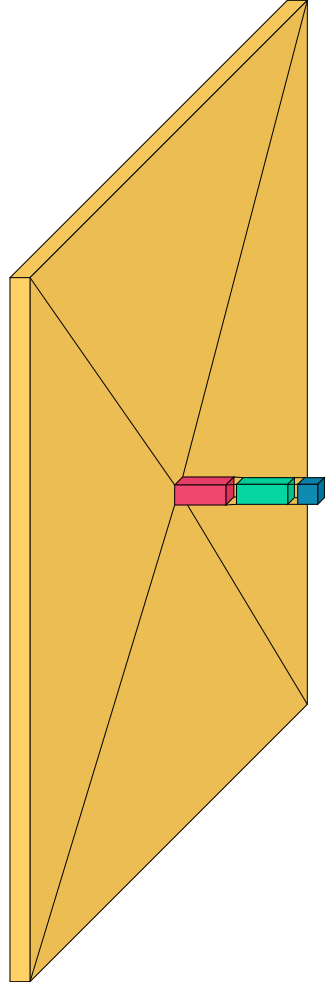

In [ ]:
visualkeras.layered_view(model)

---

The code below fits the model to the training data and utilizes a 80-20 train-validation split.

---

In [ ]:
history = model.fit(x = X_train_transfer, y = y_train, epochs=30, validation_split = 0.2)

Epoch 1/30
128/128 [==============================] - 18s 57ms/step - loss: 1.1456 - categorical_accuracy: 0.4810 - val_loss: 0.9740 - val_categorical_accuracy: 0.5571
Epoch 2/30
128/128 [==============================] - 6s 44ms/step - loss: 0.9000 - categorical_accuracy: 0.5698 - val_loss: 0.8836 - val_categorical_accuracy: 0.5902
Epoch 3/30
128/128 [==============================] - 6s 44ms/step - loss: 0.8304 - categorical_accuracy: 0.6072 - val_loss: 0.7748 - val_categorical_accuracy: 0.6273
Epoch 4/30
128/128 [==============================] - 6s 44ms/step - loss: 0.7561 - categorical_accuracy: 0.6526 - val_loss: 0.7064 - val_categorical_accuracy: 0.6907
Epoch 5/30
128/128 [==============================] - 6s 44ms/step - loss: 0.6506 - categorical_accuracy: 0.7224 - val_loss: 0.6305 - val_categorical_accuracy: 0.7161
Epoch 6/30
128/128 [==============================] - 6s 44ms/step - loss: 0.5625 - categorical_accuracy: 0.7532 - val_loss: 0.5837 - val_categorical_accuracy: 0.76

---

The code below plots the model’s loss curve.

---

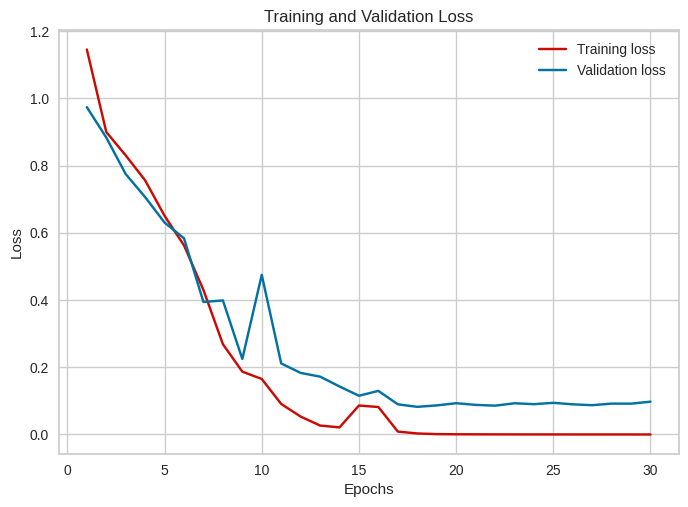

In [ ]:
plot_loss_curve(history)

---

The code below evaluates the model’s test accuracy and test loss.

---

In [ ]:
loss, metrics = model.evaluate(X_test_transfer, y_test)
print("Accuracy", metrics)
print("Loss", loss)

40/40 [==============================] - 2s 52ms/step - loss: 4.3498 - categorical_accuracy: 0.7060
Accuracy 0.7060203552246094
Loss 4.349793910980225


---

The code below evaluates the model’s test precision, recall, and F1-score.

---

In [ ]:
y_pred = model.predict(X_test_transfer)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes)
print()
print(report)

40/40 [==============================] - 1s 30ms/step

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       640
           1       0.70      0.66      0.68       448
           2       0.83      0.24      0.37       179
           3       1.00      0.17      0.29        12

    accuracy                           0.71      1279
   macro avg       0.81      0.49      0.53      1279
weighted avg       0.72      0.71      0.68      1279



---

The code below displays the model’s confusion matrix.

---

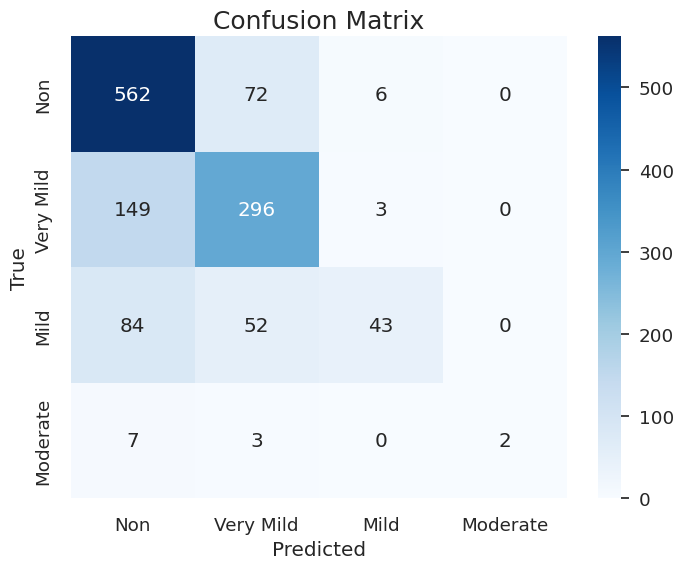

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classes = ['Non', 'Very Mild', 'Mild', 'Moderate']

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The transfer learning model achieves 100% accuracy on the training data and 97% accuracy on the validation data (derived as an 80-20 split from the training data). This clearly shows that the model was able to overfit to the data and model the validation data accurately. The loss curve further shows that the model was successfully able to converge. However, the accuracy on the test set is 71%, which may be due to the differences between the test set and the training set noted earlier. The confusion matrix showed that the model struggled the most with predicting the mild and moderate classes correctly. These classes contained very few samples compared to the other classes in the training dataset.

## Deep Neural Network

The deep neural network that I created was inspired by the architecture created by El-Latif et al. for the same dataset. Their paper “Accurate Detection of Alzheimer’s Disease Using Lightweight Deep Learning Model on MRI Data” is published in MDPI diagnostics and utilized a deep neural network to tackle the multi-class classification problem. They achieved a high degree of success using their architecture, so I decided to create a similar model for this notebook. The model utilizes a convolutional block (2x convolution and pooling) followed by a dense block (2x dense and dropout). I included an extra dense layer and drop out compared to the network proposed by El-Latif et al. This was done to further prevent overfitting to the training dataset.

---

The code below defines the model’s architecture.

---

In [ ]:
# Define the sequential model
model = models.Sequential()

# Convolutional block
model.add(layers.InputLayer(input_shape=(208, 176, 1)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())

# Flatten layer
model.add(layers.Flatten())

# Dense block with dropout
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

---

The code below prints the model summary.

---

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 174, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 103, 87, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 85, 32)       9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 42, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 67200)             0         
                                                                 
 dense_1 (Dense)             (None, 150)               1

---

The code below visualizes the model architecture.

---

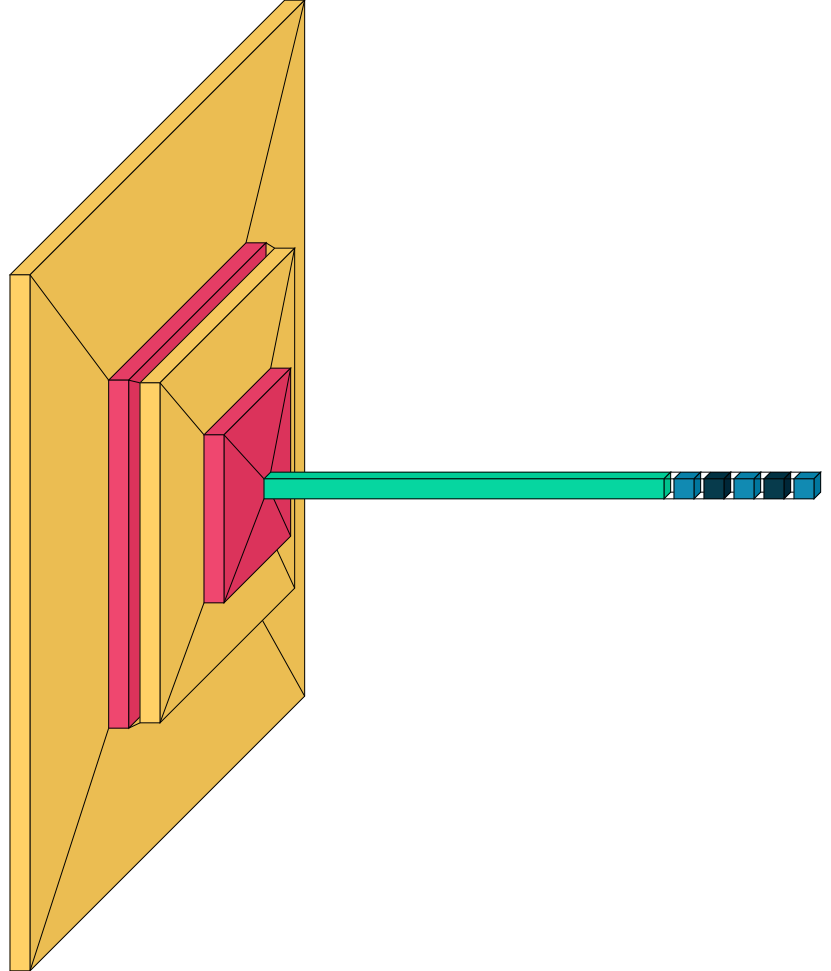

In [ ]:
visualkeras.layered_view(model)

---

The code below fits the model to the training data and utilizes an 80-20 train-validation split.

---

In [ ]:
history = model.fit(x = X_train, y = y_train, epochs=30, validation_split=0.2)

Epoch 1/30
128/128 [==============================] - 5s 15ms/step - loss: 1.0893 - categorical_accuracy: 0.4753 - val_loss: 0.9709 - val_categorical_accuracy: 0.5093
Epoch 2/30
128/128 [==============================] - 1s 11ms/step - loss: 0.9044 - categorical_accuracy: 0.5708 - val_loss: 0.7374 - val_categorical_accuracy: 0.6907
Epoch 3/30
128/128 [==============================] - 1s 11ms/step - loss: 0.6552 - categorical_accuracy: 0.7144 - val_loss: 0.4224 - val_categorical_accuracy: 0.8439
Epoch 4/30
128/128 [==============================] - 1s 11ms/step - loss: 0.3380 - categorical_accuracy: 0.8691 - val_loss: 0.2024 - val_categorical_accuracy: 0.9190
Epoch 5/30
128/128 [==============================] - 1s 10ms/step - loss: 0.1631 - categorical_accuracy: 0.9426 - val_loss: 0.1451 - val_categorical_accuracy: 0.9522
Epoch 6/30
128/128 [==============================] - 1s 11ms/step - loss: 0.0872 - categorical_accuracy: 0.9731 - val_loss: 0.0837 - val_categorical_accuracy: 0.967

---

The code below plots the model’s loss curve.

---

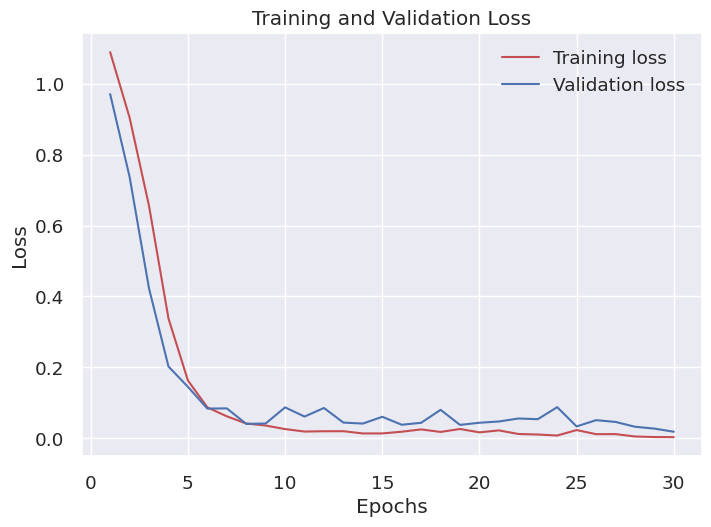

In [ ]:
plot_loss_curve(history)

---

The code below evaluates the model’s test accuracy and test loss.

---

In [ ]:
loss, metrics = model.evaluate(X_test, y_test)
print("Accuracy", metrics)
print("Loss", loss)

40/40 [==============================] - 0s 6ms/step - loss: 4.2719 - categorical_accuracy: 0.5950
Accuracy 0.5949960947036743
Loss 4.2718586921691895


---

The code below evaluates the model’s test precision, recall, and F1-score.

---

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes)
print()
print(report)

40/40 [==============================] - 0s 4ms/step

              precision    recall  f1-score   support

           0       0.78      0.53      0.63       640
           1       0.48      0.80      0.60       448
           2       0.63      0.36      0.46       179
           3       0.50      0.25      0.33        12

    accuracy                           0.59      1279
   macro avg       0.60      0.48      0.51      1279
weighted avg       0.65      0.59      0.59      1279



---

The code below displays the model’s confusion matrix.

---

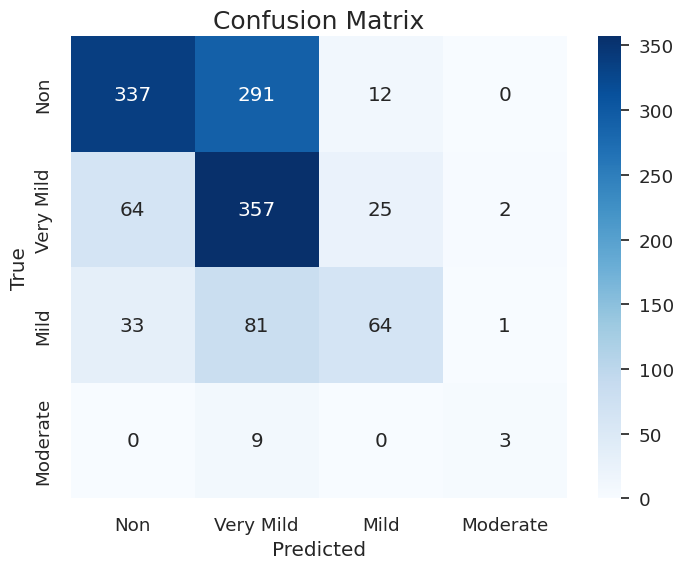

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classes = ['Non', 'Very Mild', 'Mild', 'Moderate']

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The deep model once again shows that it is capable of overfitting to the training data (99% accuracy) and generalized well to the validation data (98% accuracy). Additionally, the loss curve showed that the model converged to the optima. However, once again the model performed worse on the test dataset, with an accuracy of 57%. The confusion matrix shows that the model not only had a hard time correctly classifying mild and moderate images but also confused very mild and non images far more than the transfer learning model.

## Custom Model

Finally, I decided to create a fully connected non-convolutional model. I did this because I was curious as to how a non-convolutional network would perform compared to the other two convolutional networks. According to a medium article (https://medium.com/analytics-vidhya/comparing-image-classification-with-dense-neural-network-and-convolutional-neural-network-5f376582a695), a dense neural network had a comparable performance to a convolutional network for image classification, and thus I wanted to experiment with the performance of a dense network in this application. Furthermore, a two-layer neural network is typically sufficient to model any function, which is why I designed the network with only two hidden layers. I included a dropout layer to increase generalizability and prevent overfitting. This issue was mentioned in the medium article as well. Similar to the other networks, I used categorical cross entropy as loss and categorical accuracy as a metric because of the multi-class nature of the problem. Finally, I used 0.2 as the dropout parameter. This is because I wanted the model to converge in a reasonable number of epochs while still mitigating overfitting.

---

The code below defines the model’s architecture.

---

In [ ]:
# Define the sequential model
model = models.Sequential()

# Input layers
model.add(layers.InputLayer(input_shape=(208, 176, 1)))
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

---

The code below prints the model summary.

---

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 36608)             0         
                                                                 
 dense_16 (Dense)            (None, 150)               5491350   
                                                                 
 dense_17 (Dense)            (None, 75)                11325     
                                                                 
 dropout_6 (Dropout)         (None, 75)                0         
                                                                 
 dense_18 (Dense)            (None, 4)                 304       
                                                                 
Total params: 5502979 (20.99 MB)
Trainable params: 5502979 (20.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

The code below visualizes the model architecture.

---

In [ ]:
visualkeras.layered_view(model)

---

The code below fits the model to the training data and utilizes an 80-20 train-validation split.

---

In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=50, validation_split = 0.2)

Epoch 1/50
128/128 [==============================] - 2s 10ms/step - loss: 1.8970 - categorical_accuracy: 0.4702 - val_loss: 0.9529 - val_categorical_accuracy: 0.5337
Epoch 2/50
128/128 [==============================] - 1s 5ms/step - loss: 0.9673 - categorical_accuracy: 0.5391 - val_loss: 0.9179 - val_categorical_accuracy: 0.5668
Epoch 3/50
128/128 [==============================] - 1s 5ms/step - loss: 0.9091 - categorical_accuracy: 0.5583 - val_loss: 0.8480 - val_categorical_accuracy: 0.5639
Epoch 4/50
128/128 [==============================] - 1s 5ms/step - loss: 0.8664 - categorical_accuracy: 0.5723 - val_loss: 0.8814 - val_categorical_accuracy: 0.6088
Epoch 5/50
128/128 [==============================] - 1s 6ms/step - loss: 0.7989 - categorical_accuracy: 0.6028 - val_loss: 0.7425 - val_categorical_accuracy: 0.6224
Epoch 6/50
128/128 [==============================] - 1s 5ms/step - loss: 0.7649 - categorical_accuracy: 0.6277 - val_loss: 0.7094 - val_categorical_accuracy: 0.6488
Epo

---

The code below plots the model’s loss curve.

---

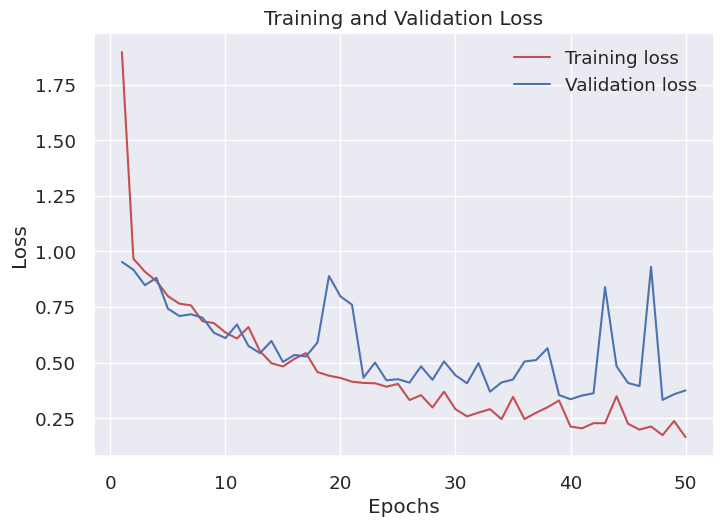

In [ ]:
plot_loss_curve(history)

---

The code below evaluates the model’s test accuracy and test loss.

---

In [ ]:
loss, metrics = model.evaluate(X_test, y_test)
print("Accuracy", metrics)
print("Loss", loss)

40/40 [==============================] - 0s 4ms/step - loss: 4.0205 - categorical_accuracy: 0.5489
Accuracy 0.548866331577301
Loss 4.020545959472656


---

The code below evaluates the model’s test precision, recall, and F1-score.

---

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes)
print()
print(report)

40/40 [==============================] - 0s 3ms/step

              precision    recall  f1-score   support

           0       0.57      0.93      0.71       640
           1       0.43      0.21      0.28       448
           2       0.81      0.07      0.13       179
           3       0.00      0.00      0.00        12

    accuracy                           0.55      1279
   macro avg       0.45      0.30      0.28      1279
weighted avg       0.55      0.55      0.47      1279



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



---

The code below displays the model’s confusion matrix.

---

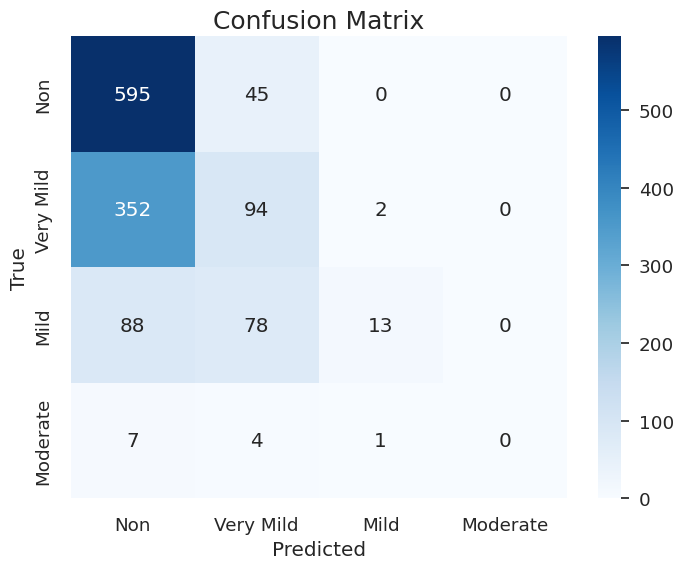

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
classes = ['Non', 'Very Mild', 'Mild', 'Moderate']

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The dense network showed that it is capable of overfitting to the training data and generalizing well to the validation data, ~95% and ~88% accuracy respectively. The loss curve also shows that the model converged to the optima. Furthermore, the test accuracy is consistent with the trend set by the other two models. The test accuracy is significantly lower than either the training or validation accuracy, ~55%. Notably, the confusion matrix shows that the dense network was unable to classify the very mild class very well, with a majority of the very mild test images being classified as non demented.

# Model Evaluation
---

This section will compare the performance of the three models based on accuracy, precision, recall, and F1-score. The strengths and weaknesses of each model will be analyzed in terms of training time, performance, and generalizability.

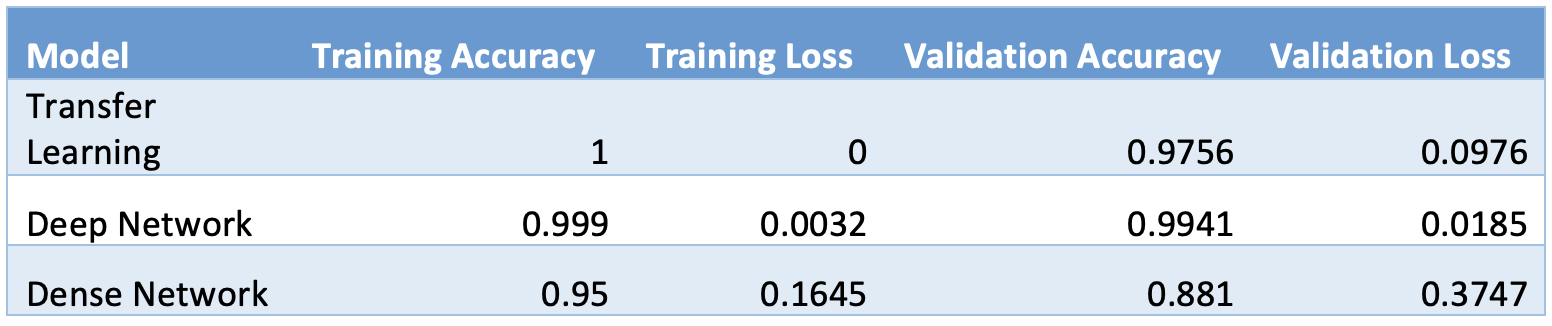

*Training process comparison*

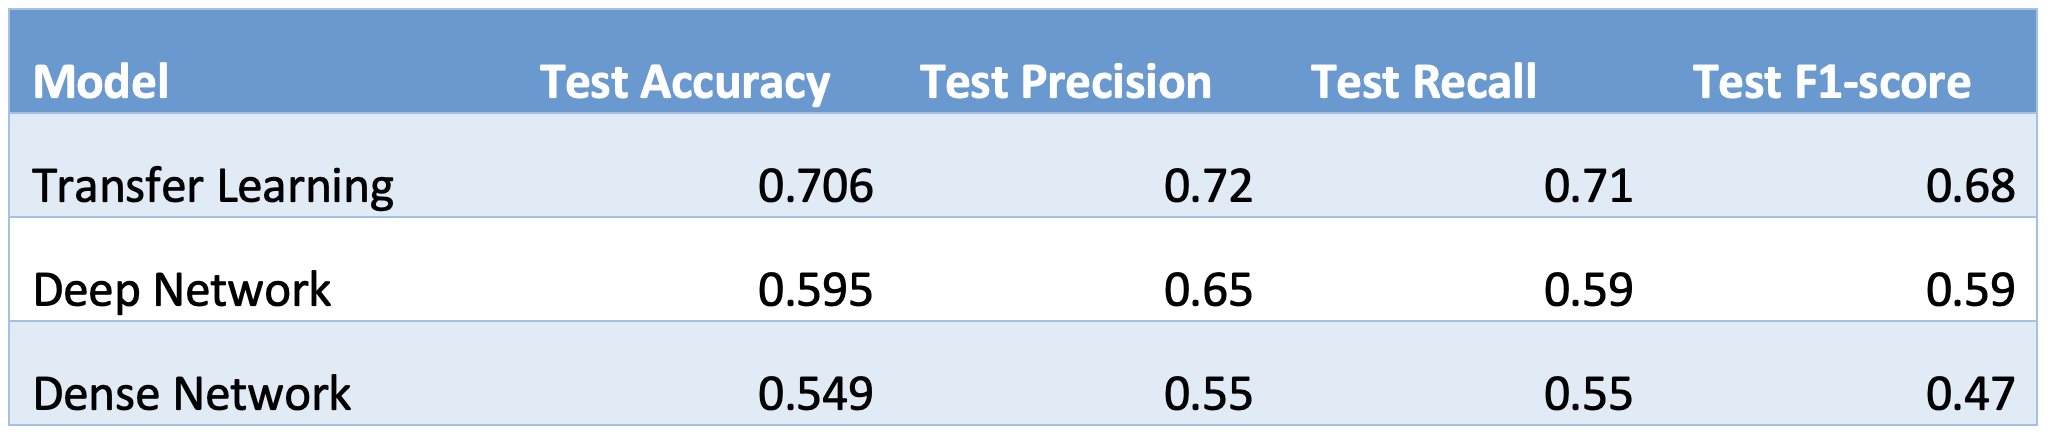

*Test metrics comparison*

## Performance and Generalizability

All three models showed that they are capable of overfitting to the training data, which is the first step in developing a successful machine learning model. All three models achieved a training accuracy of 95% or above. The dense model had the lowest training accuracy because I implemented a dropout layer to prevent overfitting and increase generalizability. Furthermore, the transfer learning and deep network also performed very well on the validation data (derived from the original training dataset). This means that they generalized well to unseen data as well. The dense model performed slightly worse due to the dropout layer. Overall, all three models showed that they were capable of not only overfitting to the training data, but also generalizing to unseen validation data. The transfer learning model had a slight edge over the deep network, which performed slightly better than the dense network. However, all three networks performed poorly on the test data. The transfer learning model had 71% accuracy on the test data while the deep learning model had 60% accuracy and the dense network had 55% accuracy. This large gap between validation accuracy and test accuracy suggests that there are meaningful differences between the two datasets. This was observed earlier in the EDA. The test data contained a large gap in the middle of the brain slices, while most of the training data did not. This was seen in the image previews as well as in the PCA, where the test data occupied a distinct region from the training data, suggesting that there is an intrinsic difference between the training and test data. To improve the performance of the models on the test data, I would find what the difference is and find a way to preprocess the data such that the difference is mitigated. Regardless, the transfer learning model performed the best on the test dataset, followed by the deep network and then the dense network. This makes sense as the transfer learning model had more general information about image patterns via its ImageNet weights. The CNN also was better able to understand image patterns, while the dense network was not able to use convolution to capture local patterns. Finally, the precision, recall, and F1 scores of the models on the test data mirrored the trend set by the accuracies of the models (and all metrics were very similar). The transfer learning model had the best metrics, followed by the deep network and then the dense network. The confusion matrices also confirmed this trend.

## Training Time

The training time of the models was correlated with the performance of the models. The transfer learning model took the longest to train, with the CNN and dense net following suite. This makes sense; the more complicated the general architecture, the longer it took to train. Furthermore, it suggests that in this case, more complicated models were more successful because of their increased ability to generalize to the test dataset. All models took a reasonable time to train, however, the large image size and dataset size created a very high memory pressure. I needed to use a high-RAM session on Google Colab in order to run the notebook without crashing. I also maxed out the GPU-RAM while developing the models. Thus, while time complexity was not an issue, memory pressure was.

#Discussions and Conclusions
---

This section discusses the results, provide insights into the behavior of the different models, and concluded with recommendations on the most effective model for predicting the stages of Alzheimer’s disease.

##Transfer Learning vs Convolution vs Dense

The different models had different strengths and weaknesses that may lend themselves to different applications. The transfer learning model is large and complex, but it performs well on validation data, and generalizes the best to the test data. On the other hand, the dense model is very lightweight, overfits very fast, and performs well on the validation data but poorly on the test data. The convolutional model is a compromise between the two. For an application which requires predictions on test data that has meaningful differences from the training data, the transfer learning model performs better. It can leverage the knowledge it gained about image patterns from its pretrained weights to better generalize. However, if the training and testing data are in the same domain without any significant differences, the dense model may have a comparable performance while also being lightweight. The deep CNN allows for an intermediate between the lightweight (but highly prone to overfit) dense model and the complex (but more generalizable) transfer learning model. For this specific problem, the test data had meaningful differences that made the transfer learning solution the best. However, all three models preformed similarly on the training and validation data.

##Best Model

Overall, given the test data, the transfer learning model preformed the best. Due to its pretrained weights, it was best able to recognize general image patterns that lend to classification based on the severity of the patient’s dementia. It had the highest training, testing, and validation accuracy, making it the best for predicting the stages of Alzheimer’s disease. Pre-trained models typically allow for leveraging of pretrained weights, state-of-the-art architectures, and fine tuning to make effective models for many applications, such as in this case. Furthermore, if possible, I would find an image preprocessing solution that helps mitigate the difference between the training and test data to allow the model to better generalize.

#References
---

This section contains the references that I used to create this notebook.

-	https://www.cdc.gov/aging/aginginfo/alzheimers.htm
-	https://www.nia.nih.gov/health/alzheimers-symptoms-and-diagnosis/how-biomarkers-help-diagnose-dementia
- https://www.researchgate.net/figure/Brain-Atrophy-in-Advanced-Alzheimers-Disease-41_fig2_273768877
- https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images/code
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10093003/
- https://medium.com/analytics-vidhya/comparing-image-classification-with-dense-neural-network-and-convolutional-neural-network-5f376582a695
- https://developer.apple.com/documentation/createml/improving-your-model-s-accuracy